___
# Ciência dos Dados - PROJETO 1

## Emanuelle Silva Moço

## Descrever os domicílios brasileiros quanto ao acesso à Internet e à Televisão

Como a condição de ocupação de domicílio influencia no acesso à Internet e Televisão no âmbito regional?

___
## Introdução


A inclusão digital está cada vez mais presente nas nossas vidas. Em 2014, mais da metade dos domicílios Brasileiros passou a ter acesso à internet. No ano anterior, segundo o PNAD, esse índice era de 48%. Grande parte desse acesso é feito por meio de Smartphones, Tablets, TVs e outros dispositivos. Junto a isso, temos o fato de que o acesso a TV é muito mais popular e comum em todo o território nacional, abrangendo aréas que ainda não acesso à interne.

Este trabalho tem como objetivo analisar se a condição de ocupação dos domicílios brasileiros influenciam o acesso à internet e a televisão, e, em caso positivo, como essa influencia afeta diretamente nas residencias. Para isso, será feito uma análise por regiões (Centro-Oeste, Nordeste, Norte, Sul e Sudeste), a fim de agrupar os Estados, como a condição de moradia, ou seja, se o domicílio é próprio (pago ou pagando), alugado ou cedido, acesso à internet nas residências, recebimento de sinal de tv digital e por antena. A conclusão será obtida por meio da analise de gráficos e tabelas, como também usando fontes de informação concretas e que possam confirmar ou chegar a uma hipótese que ajude a entender a credibilidade das informações chegadas. 

___
## Análise e Resultados

In [340]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('ggplot')

In [341]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Emanuelle\Documents\Ciência dos Dados\Projeto 1


In [342]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')
dados = pd.read_csv('DOM2015.csv',sep=',')
dados_2014 = pd.read_csv('DOM2014.csv',sep=',')



In [343]:
tabela = dados.loc [:,["UF", "V4621","V0207", "V02322","V02273", "V02274", "V4105"]]
tabela_2014 = dados_2014.loc [:,["UF", "V4621","V0207", "V02322","V02273", "V02274", "V4105"]]   


#V4621 Renda per capita",
#V0207 Condição de ocupação do domicílio
#V02322":"Acesso à Internet no domicilio
#V02273":"Tem televisão com recepçao de sinal digital de tv aberta",
#V02274" : "Tem televisão com antena parabólica
#V4105":"Situação censitária da moradia"    


tabela.head()
#abela_2014.head()

,UF,V4621,V0207,V02322,V02273,V02274,V4105
0,11,800.0,3.0,4.0,1.0,3.0,1
1,11,NaN,NaN,NaN,NaN,NaN,1
2,11,1150.0,3.0,2.0,NaN,NaN,1
3,11,793.0,1.0,2.0,1.0,3.0,1
4,11,2900.0,1.0,4.0,NaN,NaN,1


In [344]:
dados_nao_nulos = tabela[pd.notnull(dados.UF)&pd.notnull(dados.V4621)&pd.notnull(dados.V0207)&pd.notnull(dados.V02322)&pd.notnull(dados.V02273)&pd.notnull(dados.V02274)&pd.notnull(dados.V4105)]
dados_nao_nulos = dados_nao_nulos[dados.V4621!=999999999999]

dados_nao_nulos_2014 = tabela[pd.notnull(dados_2014.UF)&pd.notnull(dados_2014.V4621)&pd.notnull(dados_2014.V0207)&pd.notnull(dados_2014.V02322)&pd.notnull(dados_2014.V02273)&pd.notnull(dados_2014.V02274)&pd.notnull(dados_2014.V4105)]
dados_nao_nulos_2014 = dados_nao_nulos[dados_2014.V4621!=999999999999]

dados_nao_nulos_2014.head()

C:\Users\Emanuelle\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\Emanuelle\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Emanuelle\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,UF,V4621,V0207,V02322,V02273,V02274,V4105
0,11,800.0,3.0,4.0,1.0,3.0,1
3,11,793.0,1.0,2.0,1.0,3.0,1
5,11,1990.0,1.0,2.0,1.0,1.0,1
6,11,350.0,1.0,4.0,1.0,3.0,1
7,11,1333.0,1.0,4.0,1.0,3.0,1


In [345]:
#dados_nao_nulos.head()

dados_nao_nulos.to_csv("resumo.csv")
tabela.to_csv("resumo.csv") #para salvar

dados_nao_nulos_2014.to_csv("resumo_2014.csv")
tabela_2014.to_csv("resumo_2014.csv") #para salvar

In [346]:
#Definindo as variáveis qualitativas como categóricas 2015
dados_nao_nulos.UF = dados.UF.astype('category')
dados_nao_nulos.UF.cat.categories = (['Rondônia', 'Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piaui','Ceará','Rio Grande do Norte','Paraíba','Pernamnuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espirito Santo','Rio de janeiro','Sâo Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])
dados_nao_nulos.V0207 = dados.V0207.astype('category')
dados_nao_nulos.V0207.cat.categories = (['Próprio - pago', 'Próprio - pagando', 'Alugado','Cedido por empregador', 'Cedido outra forma', 'Outro'])
dados_nao_nulos.V02322 = dados.V02322.astype('category')
dados_nao_nulos.V02322.cat.categories = (['Sim', 'Não'])
dados_nao_nulos.V02273 = dados.V02273.astype('category')
dados_nao_nulos.V02273.cat.categories = (['Sim', 'Não', 'Não sabe'])
dados_nao_nulos.V02274 = dados.V02274.astype('category')
dados_nao_nulos.V02274.cat.categories = (['Sim', 'Não', 'Não sabe'])
dados_nao_nulos.V4105 = dados.V4105.astype('category')
dados_nao_nulos.V4105.cat.categories = (['URBANA - Cidade ou vila, área urbanizada','URBANA - Cidade ou vila, área não urbanizada','URBANA - Área urbana isolada','RURAL - Aglomerado rural de extensão urbana','RURAL - Aglomerado rural, isolado, povoado','RURAL - Aglomerado rural, isolado, núcleo','RURAL - Aglomerado rural, isolado, outros aglomerados','RURAL - Zona rural exclusive aglomerado rural'])

#Definindo as variáveis qualitativas como categóricas 2014
dados_nao_nulos_2014.UF = dados.UF.astype('category')
dados_nao_nulos_2014.UF.cat.categories = (['Rondônia', 'Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piaui','Ceará','Rio Grande do Norte','Paraíba','Pernamnuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espirito Santo','Rio de janeiro','Sâo Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])
dados_nao_nulos_2014.V0207 = dados.V0207.astype('category')
dados_nao_nulos_2014.V0207.cat.categories = (['Próprio - pago', 'Próprio - pagando', 'Alugado','Cedido por empregador', 'Cedido outra forma', 'Outro'])
dados_nao_nulos_2014.V02322 = dados.V02322.astype('category')
dados_nao_nulos_2014.V02322.cat.categories = (['Sim', 'Não'])
dados_nao_nulos_2014.V02273 = dados.V02273.astype('category')
dados_nao_nulos_2014.V02273.cat.categories = (['Sim', 'Não', 'Não sabe'])
dados_nao_nulos_2014.V02274 = dados.V02274.astype('category')
dados_nao_nulos_2014.V02274.cat.categories = (['Sim', 'Não', 'Não sabe'])
dados_nao_nulos_2014.V4105 = dados.V4105.astype('category')
dados_nao_nulos_2014.V4105.cat.categories = (['URBANA - Cidade ou vila, área urbanizada','URBANA - Cidade ou vila, área não urbanizada','URBANA - Área urbana isolada','RURAL - Aglomerado rural de extensão urbana','RURAL - Aglomerado rural, isolado, povoado','RURAL - Aglomerado rural, isolado, núcleo','RURAL - Aglomerado rural, isolado, outros aglomerados','RURAL - Zona rural exclusive aglomerado rural'])



C:\Users\Emanuelle\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [347]:
#considerei que se uma residência tem televisão com recepçao de sinal digital de tv aberta, OU tem televisão com antena parabólica
#essa residência TEM sinal de TB
#_________
#2015
#criar uma nova coluna 'Tem sinal TV'
dados_nao_nulos.loc[(dados_nao_nulos.V02273=='Sim') | (dados_nao_nulos.V02274=='Sim'), 'Tem_sinal_TV'] = 'Sim'
dados_nao_nulos.loc[(dados_nao_nulos.V02273=='Não') & (dados_nao_nulos.V02274=='Não'), 'Tem_sinal_TV'] = 'Não'
dados_nao_nulos.loc[(dados_nao_nulos.V02273=='Sim') & (dados_nao_nulos.V02274=='Não'), 'Tem_sinal_TV'] = 'Sim'
dados_nao_nulos.loc[(dados_nao_nulos.V02273=='Não') & (dados_nao_nulos.V02274=='Sim'), 'Tem_sinal_TV'] = 'Sim'

#criar uma nova coluna 'Área'
dados_nao_nulos.loc[(dados_nao_nulos.V4105=='URBANA - Cidade ou vila, área urbanizada') | (dados_nao_nulos.V4105=='URBANA - Cidade ou vila, área não urbanizada'), 'Área'] = 'Urbana'
dados_nao_nulos.loc[(dados_nao_nulos.V4105=='URBANA - Área urbana isolada'), 'Área'] = 'Urbana'
dados_nao_nulos.loc[(dados_nao_nulos.V4105=='RURAL - Aglomerado rural de extensão urbana') | (dados_nao_nulos.V4105=='RURAL - Aglomerado rural de extensão urbana'), 'Área'] = 'Rural'
dados_nao_nulos.loc[(dados_nao_nulos.V4105=='RURAL - Aglomerado rural, isolado, núcleo') | (dados_nao_nulos.V4105=='RURAL - Aglomerado rural, isolado, outros aglomerados'), 'Área'] = 'Rural'
dados_nao_nulos.loc[(dados_nao_nulos.V4105=='RURAL - Zona rural exclusive aglomerado rural'), 'Área'] = 'Rural'

#criar uma nova coluna Região
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Rondônia') | (dados_nao_nulos.UF=='Acre') | (dados_nao_nulos.UF=='Amazonas') | (dados_nao_nulos.UF=='Roraima') | (dados_nao_nulos.UF=='Pará') | (dados_nao_nulos.UF=='Amapá') | (dados_nao_nulos.UF=='Tocantins'),'Regiao'] = 'Norte'
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Maranhão') | (dados_nao_nulos.UF=='Piaui') | (dados_nao_nulos.UF=='Caerá') | (dados_nao_nulos.UF=='Rio Grande do Norte') | (dados_nao_nulos.UF=='Paraíba') | (dados_nao_nulos.UF=='Pernambuco') | (dados_nao_nulos.UF=='Alagoas') | (dados_nao_nulos.UF=='Sergipe') | (dados_nao_nulos.UF=='Bahia'),'Regiao'] = 'Nordeste'
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Minas Gerais') | (dados_nao_nulos.UF=='Espirito Santo') | (dados_nao_nulos.UF=='Rio de Janeiro') | (dados_nao_nulos.UF=='São Paulo'),'Regiao'] = 'Sudeste'
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Paraná') | (dados_nao_nulos.UF=='Santa Catarina') | (dados_nao_nulos.UF=='Rio Grande do Sul'),'Regiao'] = 'Sul'
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Mato Grosso do Sul') | (dados_nao_nulos.UF=='Mato Grosso') | (dados_nao_nulos.UF=='Goiás') | (dados_nao_nulos.UF=='Distrito Federal'),'Regiao'] = 'Centroeste'
#_______________
#2014
dados_nao_nulos_2014.loc[(dados_nao_nulos_2014.V02273=='Sim') | (dados_nao_nulos_2014.V02274=='Sim'), 'Tem_sinal_TV'] = 'Sim'
dados_nao_nulos_2014.loc[(dados_nao_nulos_2014.V02273=='Não') & (dados_nao_nulos_2014.V02274=='Não'), 'Tem_sinal_TV'] = 'Não'
dados_nao_nulos_2014.loc[(dados_nao_nulos_2014.V02273=='Sim') & (dados_nao_nulos_2014.V02274=='Não'), 'Tem_sinal_TV'] = 'Sim'
dados_nao_nulos_2014.loc[(dados_nao_nulos_2014.V02273=='Não') & (dados_nao_nulos_2014.V02274=='Sim'), 'Tem_sinal_TV'] = 'Sim'

#criar uma nova coluna 'Área'
dados_nao_nulos_2014.loc[(dados_nao_nulos_2014.V4105=='URBANA - Cidade ou vila, área urbanizada') | (dados_nao_nulos_2014.V4105=='URBANA - Cidade ou vila, área não urbanizada'), 'Área'] = 'Urbana'
dados_nao_nulos_2014.loc[(dados_nao_nulos_2014.V4105=='URBANA - Área urbana isolada'), 'Área'] = 'Urbana'
dados_nao_nulos_2014.loc[(dados_nao_nulos_2014.V4105=='RURAL - Aglomerado rural de extensão urbana') | (dados_nao_nulos_2014.V4105=='RURAL - Aglomerado rural de extensão urbana'), 'Área'] = 'Rural'
dados_nao_nulos_2014.loc[(dados_nao_nulos_2014.V4105=='RURAL - Aglomerado rural, isolado, núcleo') | (dados_nao_nulos_2014.V4105=='RURAL - Aglomerado rural, isolado, outros aglomerados'), 'Área'] = 'Rural'
dados_nao_nulos_2014.loc[(dados_nao_nulos_2014.V4105=='RURAL - Zona rural exclusive aglomerado rural'), 'Área'] = 'Rural'

#criar uma nova coluna Região
dados_nao_nulos_2014.loc[(dados_nao_nulos_2014.UF=='Rondônia') | (dados_nao_nulos_2014.UF=='Acre') | (dados_nao_nulos_2014.UF=='Amazonas') | (dados_nao_nulos_2014.UF=='Roraima') | (dados_nao_nulos_2014.UF=='Pará') | (dados_nao_nulos_2014.UF=='Amapá') | (dados_nao_nulos_2014.UF=='Tocantins'),'Regiao'] = 'Norte'
dados_nao_nulos_2014.loc[(dados_nao_nulos_2014.UF=='Maranhão') | (dados_nao_nulos_2014.UF=='Piaui') | (dados_nao_nulos_2014.UF=='Caerá') | (dados_nao_nulos_2014.UF=='Rio Grande do Norte') | (dados_nao_nulos_2014.UF=='Paraíba') | (dados_nao_nulos_2014.UF=='Pernambuco') | (dados_nao_nulos_2014.UF=='Alagoas') | (dados_nao_nulos_2014.UF=='Sergipe') | (dados_nao_nulos_2014.UF=='Bahia'),'Regiao'] = 'Nordeste'
dados_nao_nulos_2014.loc[(dados_nao_nulos_2014.UF=='Minas Gerais') | (dados_nao_nulos_2014.UF=='Espirito Santo') | (dados_nao_nulos_2014.UF=='Rio de Janeiro') | (dados_nao_nulos_2014.UF=='São Paulo'),'Regiao'] = 'Sudeste'
dados_nao_nulos_2014.loc[(dados_nao_nulos_2014.UF=='Paraná') | (dados_nao_nulos_2014.UF=='Santa Catarina') | (dados_nao_nulos_2014.UF=='Rio Grande do Sul'),'Regiao'] = 'Sul'
dados_nao_nulos_2014.loc[(dados_nao_nulos_2014.UF=='Mato Grosso do Sul') | (dados_nao_nulos_2014.UF=='Mato Grosso') | (dados_nao_nulos_2014.UF=='Goiás') | (dados_nao_nulos_2014.UF=='Distrito Federal'),'Regiao'] = 'Centroeste'

dados_nao_nulos_2014.head()

C:\Users\Emanuelle\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Emanuelle\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,UF,V4621,V0207,V02322,V02273,V02274,V4105,Tem_sinal_TV,Área,Regiao
0,Rondônia,800.0,Alugado,Não,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",Sim,Urbana,Norte
3,Rondônia,793.0,Próprio - pago,Sim,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",Sim,Urbana,Norte
5,Rondônia,1990.0,Próprio - pago,Sim,Sim,Sim,"URBANA - Cidade ou vila, área urbanizada",Sim,Urbana,Norte
6,Rondônia,350.0,Próprio - pago,Não,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",Sim,Urbana,Norte
7,Rondônia,1333.0,Próprio - pago,Não,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",Sim,Urbana,Norte


In [348]:
#criar uma nova tabela com os dados selecionados
nova_tabela = dados_nao_nulos.loc [:,["UF", "Regiao", "V4621","V0207", "V02322", "Tem_sinal_TV", "Área"]]   
nova_tabela_2014 = dados_nao_nulos_2014.loc [:,["UF", "Regiao", "V4621","V0207", "V02322", "Tem_sinal_TV", "Área"]]   

#PARA RENOMEAR as colunas da tabela
nova_tabela = nova_tabela.rename(columns = {"V4621":"Renda_per_capita","V0207":"Condição_de_ocupação","V02322":"Acesso_Internet"})
nova_tabela_2014 = nova_tabela_2014.rename(columns = {"V4621":"Renda_per_capita","V0207":"Condição_de_ocupação","V02322":"Acesso_Internet"})


In [349]:
#criar tabela para cada regiao
tabela_Norte = nova_tabela[nova_tabela.Regiao == "Norte"]
tabela_Nordeste = nova_tabela[nova_tabela.Regiao == "Nordeste"]
tabela_Centroeste = nova_tabela[nova_tabela.Regiao == "Centroeste"]
tabela_Sul = nova_tabela[nova_tabela.Regiao == "Sul"]
tabela_Sudeste = nova_tabela[nova_tabela.Regiao == "Sudeste"]

tabela_Norte_2014 = nova_tabela_2014[nova_tabela_2014.Regiao == "Norte"]
tabela_Nordeste_2014 = nova_tabela_2014[nova_tabela_2014.Regiao == "Nordeste"]
tabela_Centroeste_2014 = nova_tabela_2014[nova_tabela_2014.Regiao == "Centroeste"]
tabela_Sul_2014 = nova_tabela_2014[nova_tabela_2014.Regiao == "Sul"]
tabela_Sudeste_2014 = nova_tabela_2014[nova_tabela_2014.Regiao == "Sudeste"]


In [350]:
tabela_Nordeste_2014.head()
#nova_tabela[nova_tabela.Área=='Rural']

,UF,Regiao,Renda_per_capita,Condição_de_ocupação,Acesso_Internet,Tem_sinal_TV,Área
21442,Maranhão,Nordeste,1576.0,Próprio - pago,Não,Não,Urbana
21443,Maranhão,Nordeste,394.0,Próprio - pago,Não,Sim,Urbana
21444,Maranhão,Nordeste,436.0,Próprio - pago,Sim,Sim,Urbana
21447,Maranhão,Nordeste,62.0,Próprio - pago,Não,Sim,Urbana
21448,Maranhão,Nordeste,187.0,Próprio - pago,Sim,Sim,Urbana


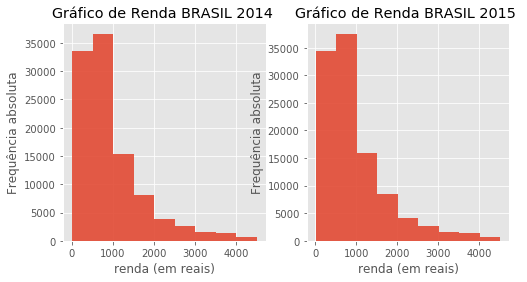

In [351]:
#RENDA BRASIL

#2014
fig = plt.figure(figsize = (10,15))
plt.subplot(121)

faixa = range(10,5000,500)
renda_Brasil_2014 = pd.cut(nova_tabela_2014.Renda_per_capita, bins=faixa)
renda_Brasil_2014.value_counts(sort=False, normalize=True)*100
plot = nova_tabela_2014.Renda_per_capita.plot.hist(bins=faixa,title='Gráfico de Renda BRASIL 2014 ', figsize=(8, 4), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

#2015
plt.subplot(122)
faixa = range(10,5000,500)
renda_Brasil = pd.cut(nova_tabela.Renda_per_capita, bins=faixa)
renda_Brasil.value_counts(sort=False, normalize=True)*100
plot = nova_tabela.Renda_per_capita.plot.hist(bins=faixa,title='Gráfico de Renda BRASIL 2015 ', figsize=(8, 4), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')



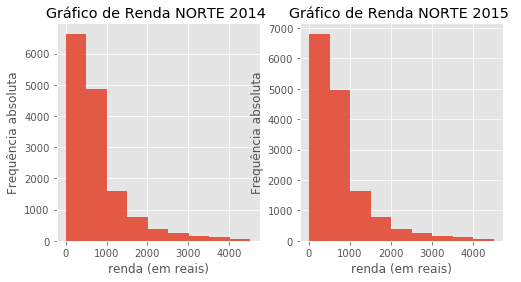

In [352]:
#RENDA NORTE

#2014
fig = plt.figure(figsize = (10,15))
plt.subplot(121)
faixa = range(10,5000,500)
renda_Norte_2014 = pd.cut(tabela_Norte_2014.Renda_per_capita, bins=faixa)
renda_Norte_2014.value_counts(sort=False, normalize=True)*100
plot = tabela_Norte_2014.Renda_per_capita.plot.hist(bins=faixa,title='Gráfico de Renda NORTE 2014 ', figsize=(8, 4), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')


#2015
plt.subplot(122)
faixa = range(10,5000,500)
renda_Norte = pd.cut(tabela_Norte.Renda_per_capita, bins=faixa)
renda_Norte.value_counts(sort=False, normalize=True)*100
plot = tabela_Norte.Renda_per_capita.plot.hist(bins=faixa,title='Gráfico de Renda NORTE 2015 ', figsize=(8, 4), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

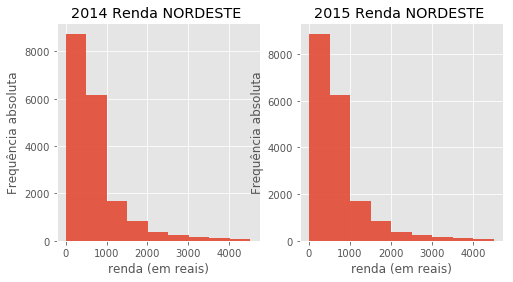

In [353]:
#2014
#RENDA NORDESTE 2014
fig = plt.figure(figsize = (10,15))
plt.subplot(121)
faixa = range(10,5000,500)
renda_Nordeste_2014 = pd.cut(tabela_Nordeste_2014.Renda_per_capita, bins=faixa)
renda_Nordeste_2014.value_counts(sort=False, normalize=True)*100
plot = tabela_Nordeste_2014.Renda_per_capita.plot.hist(bins=faixa,title='2014 Renda NORDESTE ', figsize=(8, 4), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')


#RENDA NORDESTE 2015
plt.subplot(122)
faixa = range(10,5000,500)
renda_Nordeste = pd.cut(tabela_Nordeste.Renda_per_capita, bins=faixa)
renda_Nordeste.value_counts(sort=False, normalize=True)*100
plot = tabela_Nordeste.Renda_per_capita.plot.hist(bins=faixa,title='2015 Renda NORDESTE ', figsize=(8, 4), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

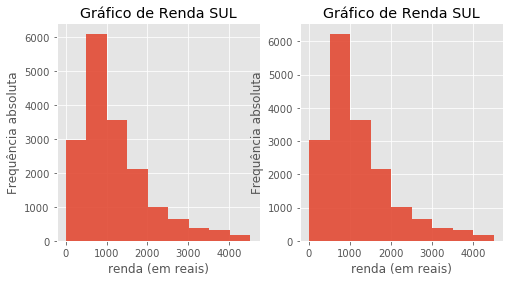

In [354]:
#2014
#RENDA SUL 
fig = plt.figure(figsize = (10,15))
plt.subplot(121)
faixa = range(10,5000,500)
renda_Sul_2014 = pd.cut(tabela_Sul_2014.Renda_per_capita, bins=faixa)
renda_Sul_2014.value_counts(sort=False, normalize=True)*100
plot = tabela_Sul_2014.Renda_per_capita.plot.hist(bins=faixa,title='Gráfico de Renda SUL', figsize=(8, 4), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

#2015
#RENDA SUL 
plt.subplot(122)
faixa = range(10,5000,500)
renda_Sul = pd.cut(tabela_Sul.Renda_per_capita, bins=faixa)
renda_Sul.value_counts(sort=False, normalize=True)*100
plot = tabela_Sul.Renda_per_capita.plot.hist(bins=faixa,title='Gráfico de Renda SUL', figsize=(8, 4), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

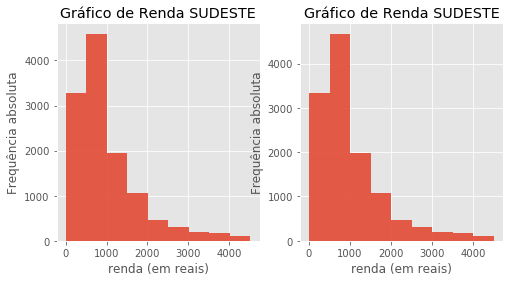

In [355]:
#2014
#RENDA SUDESTE
fig = plt.figure(figsize = (10,15))
plt.subplot(121)
faixa = range(10,5000,500)
renda_Sudeste_2014 = pd.cut(tabela_Sudeste_2014.Renda_per_capita, bins=faixa)
renda_Sudeste_2014.value_counts(sort=False, normalize=True)*100
plot = tabela_Sudeste_2014.Renda_per_capita.plot.hist(bins=faixa,title='Gráfico de Renda SUDESTE', figsize=(8, 4), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

#2015
#RENDA SUDESTE
plt.subplot(122)
faixa = range(10,5000,500)
renda_Sudeste = pd.cut(tabela_Sudeste.Renda_per_capita, bins=faixa)
renda_Sudeste.value_counts(sort=False, normalize=True)*100
plot = tabela_Sudeste.Renda_per_capita.plot.hist(bins=faixa,title='Gráfico de Renda SUDESTE', figsize=(8, 4), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

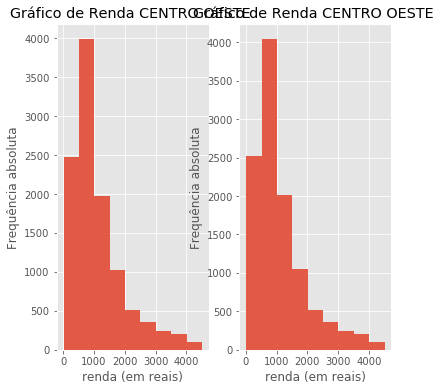

In [356]:
#2014
#RENDA CENTRO OESTE
fig = plt.figure(figsize = (10,15))
plt.subplot(121)
faixa = range(10,5000,500)
renda_CentroOeste_2014 = pd.cut(tabela_Centroeste_2014.Renda_per_capita, bins=faixa)
renda_CentroOeste_2014.value_counts(sort=False, normalize=True)*100
plot = tabela_Centroeste_2014.Renda_per_capita.plot.hist(bins=faixa,title='Gráfico de Renda CENTRO OESTE ', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

#2015
#RENDA CENTRO OESTE
plt.subplot(122)
faixa = range(10,5000,500)
renda_CentroOeste = pd.cut(tabela_Centroeste.Renda_per_capita, bins=faixa)
renda_CentroOeste.value_counts(sort=False, normalize=True)*100
plot = tabela_Centroeste.Renda_per_capita.plot.hist(bins=faixa,title='Gráfico de Renda CENTRO OESTE ', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

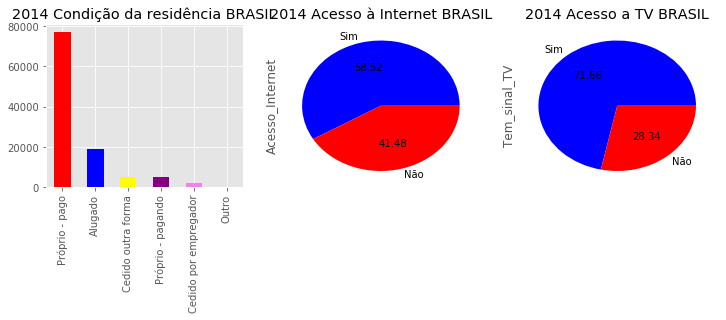

In [357]:
#2014 BRASIL
fig = plt.figure(figsize = (12,3))
plt.subplot(131)
plt.title("2014 Condição da residência BRASIL")
condicao_Brasil_2014 = nova_tabela_2014.Condição_de_ocupação.value_counts()
condicao_Brasil_2014.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)


plt.subplot(132)
plt.title("2014 Acesso à Internet BRASIL")
internet_Brasil_2014 = nova_tabela_2014.Acesso_Internet.value_counts()
internet_Brasil_2014.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


plt.subplot(133)
plt.title("2014 Acesso a TV BRASIL")
tv_Brasil_2014 = nova_tabela_2014.Tem_sinal_TV.value_counts()
tv_Brasil_2014.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)




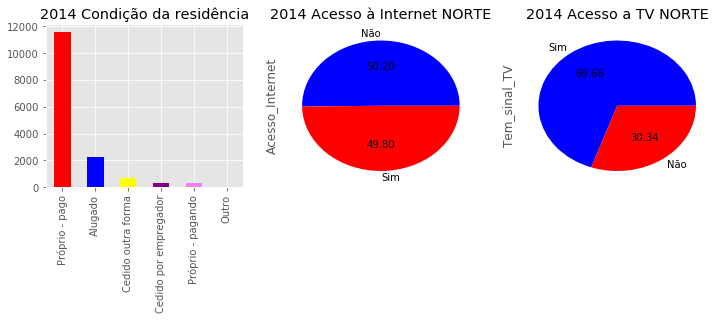

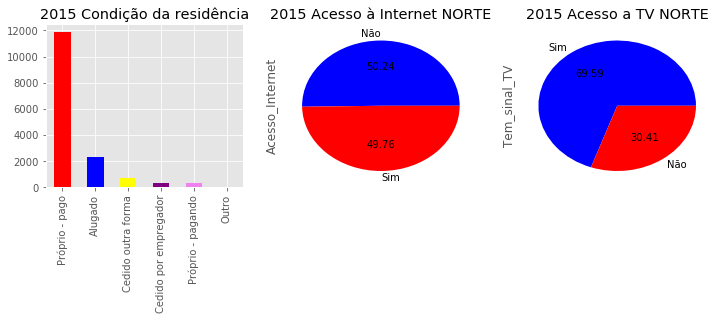

In [358]:
#2014 NORTE
fig = plt.figure(figsize = (12,3))
plt.subplot(131)
plt.title("2014 Condição da residência")
condicao_Norte_2014 = tabela_Norte_2014.Condição_de_ocupação.value_counts()
condicao_Norte_2014.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)


plt.subplot(132)
plt.title("2014 Acesso à Internet NORTE")
internet_Norte_2014 = tabela_Norte_2014.Acesso_Internet.value_counts()
internet_Norte_2014.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


plt.subplot(133)
plt.title("2014 Acesso a TV NORTE")
tv_Norte_2014 = tabela_Norte_2014.Tem_sinal_TV.value_counts()
tv_Norte_2014.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


#2015 NORTE
fig = plt.figure(figsize = (12,3))
plt.subplot(131)
plt.title("2015 Condição da residência")
condicao_Norte = tabela_Norte.Condição_de_ocupação.value_counts()
condicao_Norte.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)


plt.subplot(132)
plt.title("2015 Acesso à Internet NORTE")
internet_Norte = tabela_Norte.Acesso_Internet.value_counts()
internet_Norte.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


plt.subplot(133)
plt.title("2015 Acesso a TV NORTE")
tv_Norte = tabela_Norte.Tem_sinal_TV.value_counts()
tv_Norte.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


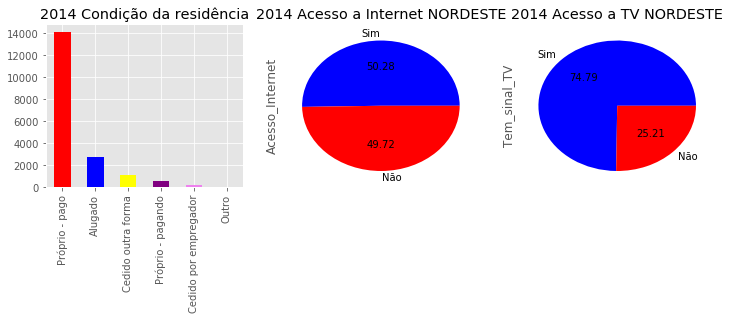

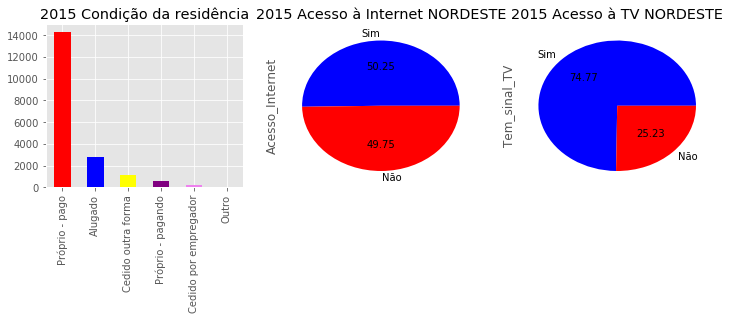

In [359]:
#NORDESTE
#2014
fig = plt.figure(figsize = (12,3))
plt.subplot(131)
plt.title("2014 Condição da residência")
condicao_Nordeste_2014 = tabela_Nordeste_2014.Condição_de_ocupação.value_counts()
condicao_Nordeste_2014.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

plt.subplot(132)
plt.title("2014 Acesso a Internet NORDESTE")
internet_Nordeste_2014 = tabela_Nordeste_2014.Acesso_Internet.value_counts()
internet_Nordeste_2014.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


plt.subplot(133)
plt.title("2014 Acesso a TV NORDESTE")
tv_Nordeste_2014 = tabela_Nordeste_2014.Tem_sinal_TV.value_counts()
tv_Nordeste_2014.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)
#############
#2015
fig = plt.figure(figsize = (12,3))
plt.subplot(131)
plt.title("2015 Condição da residência")
condicao_Nordeste = tabela_Nordeste.Condição_de_ocupação.value_counts()
condicao_Nordeste.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

plt.subplot(132)
plt.title("2015 Acesso à Internet NORDESTE")
internet_Nordeste = tabela_Nordeste.Acesso_Internet.value_counts()
internet_Nordeste.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


plt.subplot(133)
plt.title("2015 Acesso à TV NORDESTE")
tv_Nordeste = tabela_Nordeste.Tem_sinal_TV.value_counts()
tv_Nordeste.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)

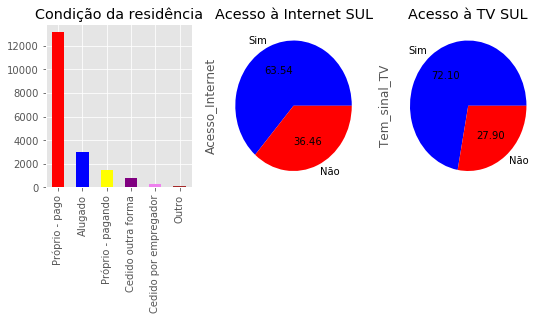

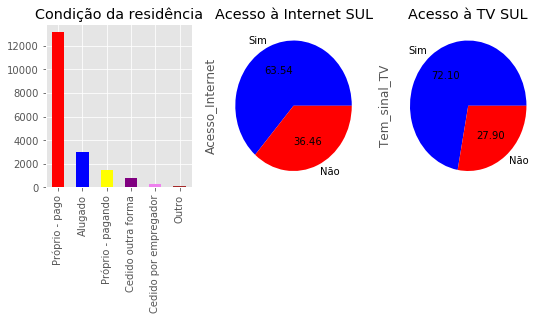

In [360]:
#2014
#SUL
fig = plt.figure(figsize = (12,3))
plt.subplot(141)
plt.title("Condição da residência")
condicao_Sul = tabela_Sul.Condição_de_ocupação.value_counts()
condicao_Sul.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

plt.subplot(142)
plt.title("Acesso à Internet SUL")
internet_Sul = tabela_Sul.Acesso_Internet.value_counts()
internet_Sul.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


plt.subplot(143)
plt.title("Acesso à TV SUL")
tv_Sul = tabela_Sul.Tem_sinal_TV.value_counts()
tv_Sul.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)

#########
#2015
fig = plt.figure(figsize = (12,3))
plt.subplot(141)
plt.title("Condição da residência")
condicao_Sul = tabela_Sul.Condição_de_ocupação.value_counts()
condicao_Sul.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

plt.subplot(142)
plt.title("Acesso à Internet SUL")
internet_Sul = tabela_Sul.Acesso_Internet.value_counts()
internet_Sul.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


plt.subplot(143)
plt.title("Acesso à TV SUL")
tv_Sul = tabela_Sul.Tem_sinal_TV.value_counts()
tv_Sul.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)

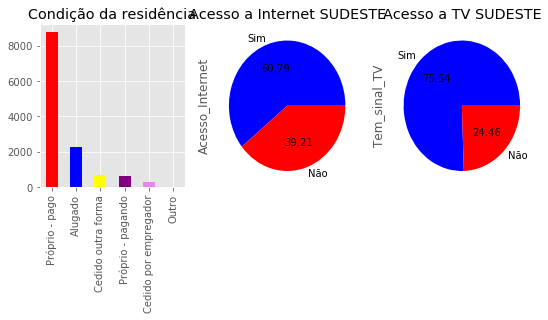

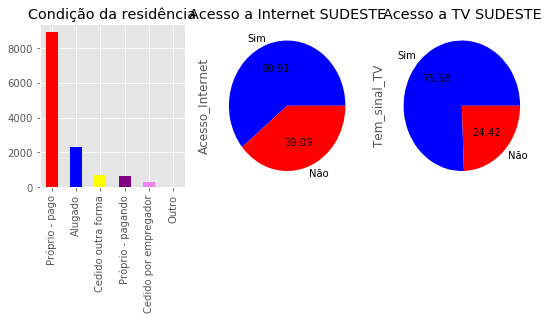

In [361]:
#2014
#SUDESTE
fig = plt.figure(figsize = (12,3))
plt.subplot(141)
plt.title("Condição da residência")
condicao_Sudeste_2014 = tabela_Sudeste_2014.Condição_de_ocupação.value_counts()
condicao_Sudeste_2014.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

plt.subplot(142)
plt.title("Acesso a Internet SUDESTE")
internet_Sudeste_2014 = tabela_Sudeste_2014.Acesso_Internet.value_counts()
internet_Sudeste_2014.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


plt.subplot(143)
plt.title("Acesso a TV SUDESTE")
tv_Sudeste_2014 = tabela_Sudeste_2014.Tem_sinal_TV.value_counts()
tv_Sudeste_2014.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)
############

#2015
fig = plt.figure(figsize = (12,3))
plt.subplot(141)
plt.title("Condição da residência")
condicao_Sudeste = tabela_Sudeste.Condição_de_ocupação.value_counts()
condicao_Sudeste.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

plt.subplot(142)
plt.title("Acesso a Internet SUDESTE")
internet_Sudeste = tabela_Sudeste.Acesso_Internet.value_counts()
internet_Sudeste.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


plt.subplot(143)
plt.title("Acesso a TV SUDESTE")
tv_Sudeste = tabela_Sudeste.Tem_sinal_TV.value_counts()
tv_Sudeste.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)

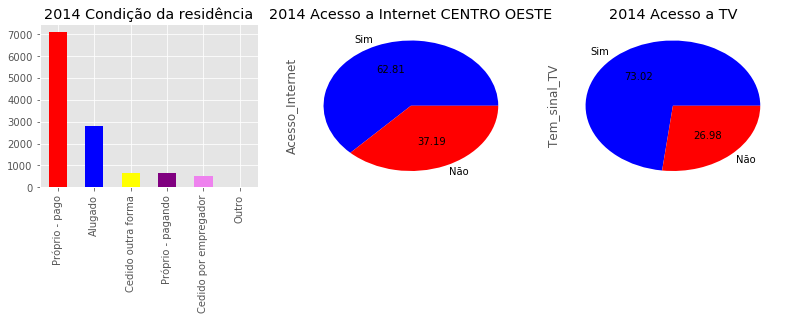

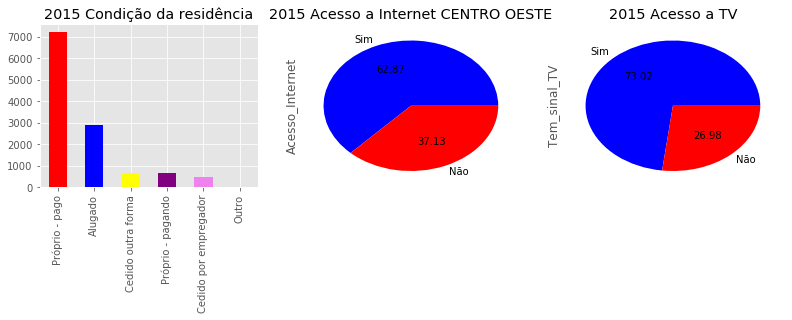

In [362]:
#2014
#Centro Oeste
fig = plt.figure(figsize = (18,3))
plt.subplot(141)
plt.title("2014 Condição da residência")
condicao_Centroeste_2014 = tabela_Centroeste_2014.Condição_de_ocupação.value_counts()
condicao_Centroeste_2014.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

plt.subplot(142)
plt.title("2014 Acesso a Internet CENTRO OESTE")
internet_Centroeste_2014 = tabela_Centroeste_2014.Acesso_Internet.value_counts()
internet_Centroeste_2014.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)

plt.subplot(143)
plt.title("2014 Acesso a TV")
tv_Centroeste_2014 = tabela_Centroeste_2014.Tem_sinal_TV.value_counts()
tv_Centroeste_2014.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)

#________________________________
#2015
#Centro Oeste
fig = plt.figure(figsize = (18,3))
plt.subplot(141)
plt.title("2015 Condição da residência")
condicao_Centroeste = tabela_Centroeste.Condição_de_ocupação.value_counts()
condicao_Centroeste.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

plt.subplot(142)
plt.title("2015 Acesso a Internet CENTRO OESTE")
internet_Centroeste = tabela_Centroeste.Acesso_Internet.value_counts()
internet_Centroeste.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)

plt.subplot(143)
plt.title("2015 Acesso a TV")
tv_Centroeste = tabela_Centroeste.Tem_sinal_TV.value_counts()
tv_Centroeste.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)

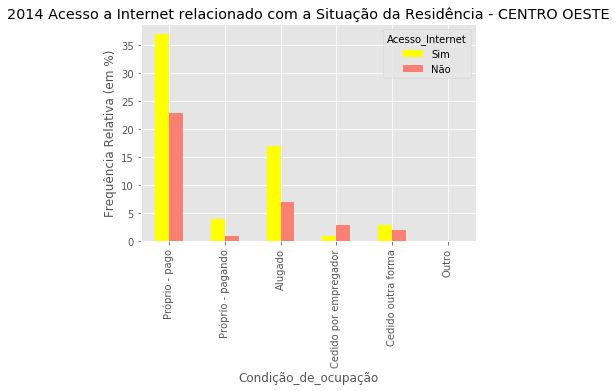

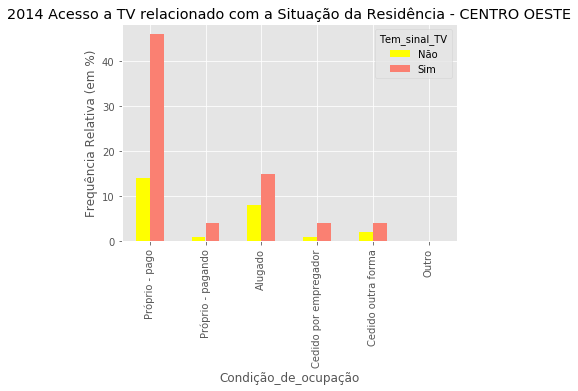

In [363]:
#2014
#fig = plt.figure(figsize = (18,3))
#plt.subplot(141)
ct_in_centroeste_2014 = pd.crosstab(tabela_Centroeste_2014.Condição_de_ocupação, tabela_Centroeste_2014.Acesso_Internet)
ct_in_centroeste_2014 = (ct_in_centroeste_2014/ct_in_centroeste_2014.sum().sum()*100).round(decimals=0)
ct_in_centroeste_2014.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2014 Acesso a Internet relacionado com a Situação da Residência - CENTRO OESTE")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(142)
ct_tv_centroeste_2014 = pd.crosstab(tabela_Centroeste_2014.Condição_de_ocupação, tabela_Centroeste_2014.Tem_sinal_TV)
ct_tv_centroeste_2014 = (ct_tv_centroeste_2014/ct_tv_centroeste_2014.sum().sum()*100).round(decimals=0)
ct_tv_centroeste_2014.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2014 Acesso a TV relacionado com a Situação da Residência - CENTRO OESTE")
plt.ylabel('Frequência Relativa (em %)')

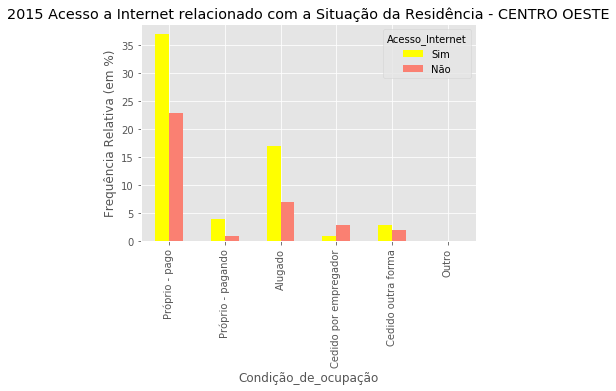

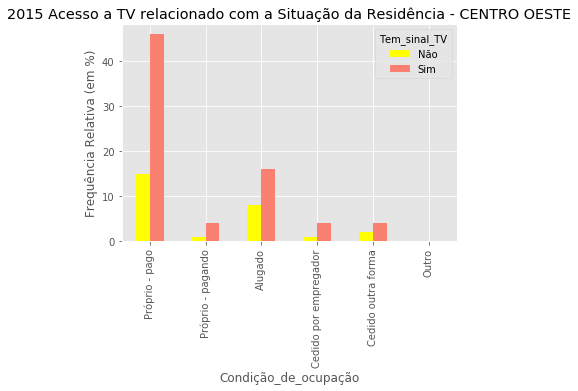

In [364]:
#2015
#fig = plt.figure(figsize = (18,3))
#plt.subplot(141)
ct_in_centroeste = pd.crosstab(tabela_Centroeste.Condição_de_ocupação, tabela_Centroeste.Acesso_Internet)
ct_in_centroeste = (ct_in_centroeste/ct_in_centroeste.sum().sum()*100).round(decimals=0)
ct_in_centroeste.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2015 Acesso a Internet relacionado com a Situação da Residência - CENTRO OESTE")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(142)
ct_tv_centroeste = pd.crosstab(tabela_Centroeste.Condição_de_ocupação, tabela_Centroeste.Tem_sinal_TV)
ct_tv_centroeste = (ct_tv_centroeste/ct_tv_centroeste.sum().sum()*100).round(decimals=0)
ct_tv_centroeste.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2015 Acesso a TV relacionado com a Situação da Residência - CENTRO OESTE")
plt.ylabel('Frequência Relativa (em %)')

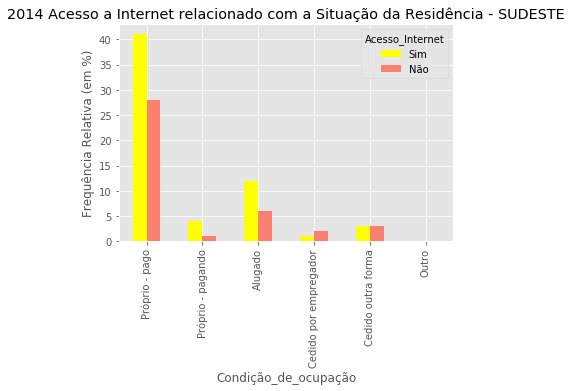

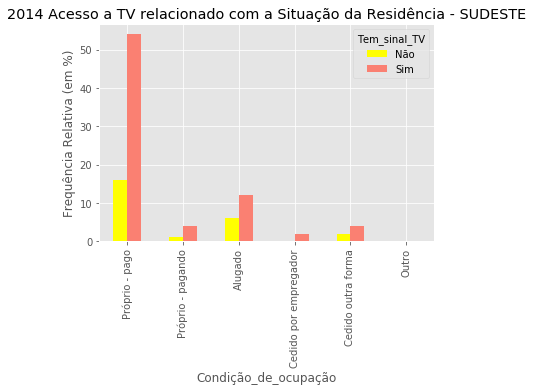

In [365]:
#2014 SUDESTE
#fig = plt.figure(figsize = (8,2))
#plt.subplot(131)
ct_in_Sudeste_2014 = pd.crosstab(tabela_Sudeste_2014.Condição_de_ocupação, tabela_Sudeste_2014.Acesso_Internet)
ct_in_Sudeste_2014 = (ct_in_Sudeste_2014/ct_in_Sudeste_2014.sum().sum()*100).round(decimals=0)
ct_in_Sudeste_2014.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2014 Acesso a Internet relacionado com a Situação da Residência - SUDESTE")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(132)
ct_tv_Sudeste_2014 = pd.crosstab(tabela_Sudeste_2014.Condição_de_ocupação, tabela_Sudeste_2014.Tem_sinal_TV)
ct_tv_Sudeste_2014 = (ct_tv_Sudeste_2014/ct_tv_Sudeste_2014.sum().sum()*100).round(decimals=0)
ct_tv_Sudeste_2014.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2014 Acesso a TV relacionado com a Situação da Residência - SUDESTE")
plt.ylabel('Frequência Relativa (em %)')


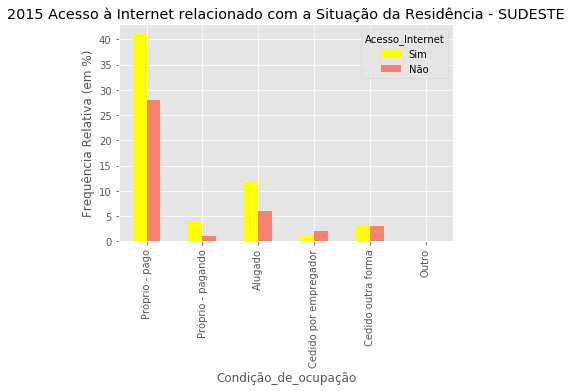

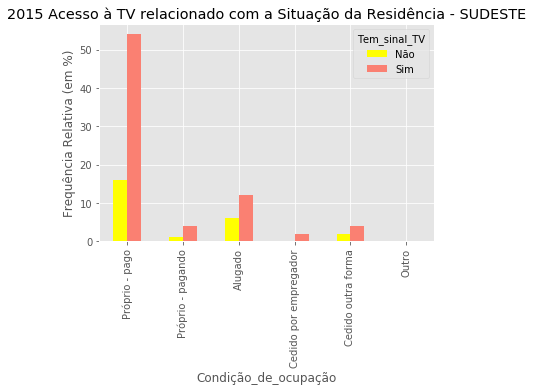

In [373]:
#2015 SUDESTE
#fig = plt.figure(figsize = (8,2))
#plt.subplot(131)
ct_in_Sudeste = pd.crosstab(tabela_Sudeste.Condição_de_ocupação, tabela_Sudeste.Acesso_Internet)
ct_in_Sudeste = (ct_in_Sudeste/ct_in_Sudeste.sum().sum()*100).round(decimals=0)
ct_in_Sudeste.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2015 Acesso à Internet relacionado com a Situação da Residência - SUDESTE")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(132)
ct_tv_Sudeste = pd.crosstab(tabela_Sudeste.Condição_de_ocupação, tabela_Sudeste.Tem_sinal_TV)
ct_tv_Sudeste = (ct_tv_Sudeste/ct_tv_Sudeste.sum().sum()*100).round(decimals=0)
ct_tv_Sudeste.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2015 Acesso à TV relacionado com a Situação da Residência - SUDESTE")
plt.ylabel('Frequência Relativa (em %)')

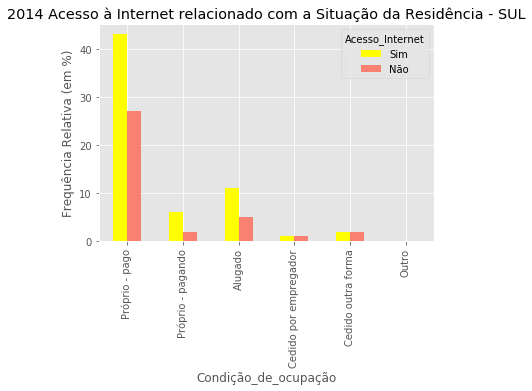

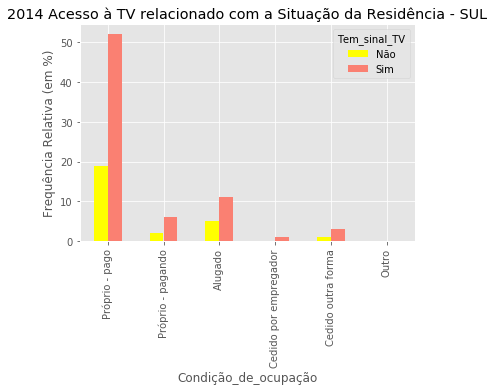

In [367]:
#2014 SUL
#plt.subplot(131)
ct_in_Sul_2014 = pd.crosstab(tabela_Sul_2014.Condição_de_ocupação, tabela_Sul_2014.Acesso_Internet)
ct_in_Sul_2014 = (ct_in_Sul_2014/ct_in_Sul_2014.sum().sum()*100).round(decimals=0)
ct_in_Sul_2014.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2014 Acesso à Internet relacionado com a Situação da Residência - SUL")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(132)
ct_tv_Sul_2014 = pd.crosstab(tabela_Sul_2014.Condição_de_ocupação, tabela_Sul_2014.Tem_sinal_TV)
ct_tv_Sul_2014 = (ct_tv_Sul_2014/ct_tv_Sul_2014.sum().sum()*100).round(decimals=0)
ct_tv_Sul_2014.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2014 Acesso à TV relacionado com a Situação da Residência - SUL")
plt.ylabel('Frequência Relativa (em %)')

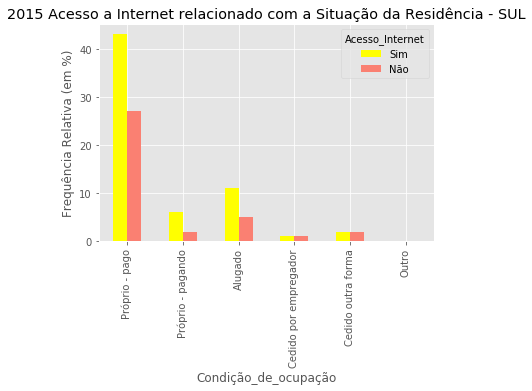

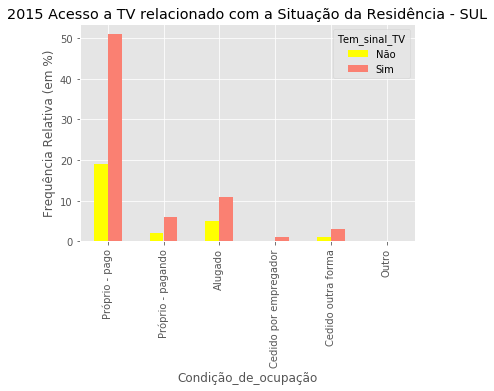

In [368]:
#2015 SUL
#fig = plt.figure(figsize = (8,2))
#plt.subplot(131)
ct_in_Sul = pd.crosstab(tabela_Sul.Condição_de_ocupação, tabela_Sul.Acesso_Internet)
ct_in_Sul = (ct_in_Sul/ct_in_Sul.sum().sum()*100).round(decimals=0)
ct_in_Sul.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2015 Acesso a Internet relacionado com a Situação da Residência - SUL")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(132)
ct_tv_Sul = pd.crosstab(tabela_Sul.Condição_de_ocupação, tabela_Sul.Tem_sinal_TV)
ct_tv_Sul = (ct_tv_Sul/ct_tv_Sul.sum().sum()*100).round(decimals=0)
ct_tv_Sul.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2015 Acesso a TV relacionado com a Situação da Residência - SUL")
plt.ylabel('Frequência Relativa (em %)')

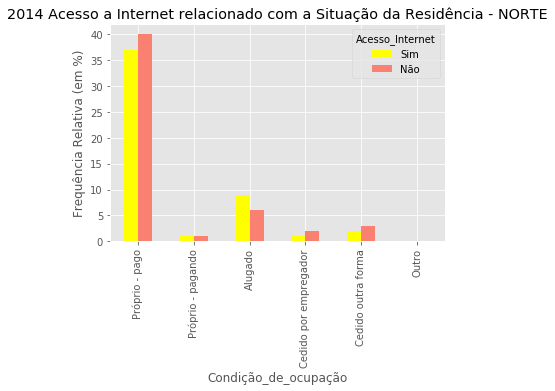

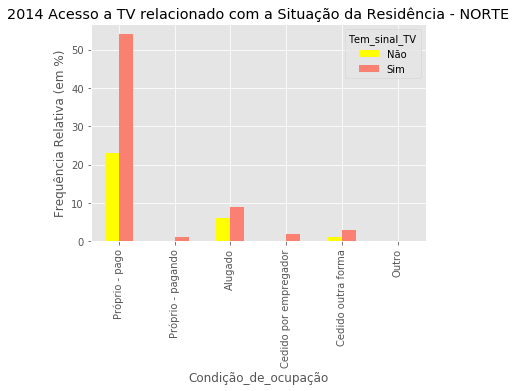

In [369]:
#2014 NORTE
#fig = plt.figure(figsize = (8,2))
#plt.subplot(131)
ct_in_Norte_2014 = pd.crosstab(tabela_Norte_2014.Condição_de_ocupação, tabela_Norte_2014.Acesso_Internet)
ct_in_Norte_2014 = (ct_in_Norte_2014/ct_in_Norte_2014.sum().sum()*100).round(decimals=0)
ct_in_Norte_2014.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2014 Acesso a Internet relacionado com a Situação da Residência - NORTE")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(132)
ct_tv_Norte_2014 = pd.crosstab(tabela_Norte_2014.Condição_de_ocupação, tabela_Norte_2014.Tem_sinal_TV)
ct_tv_Norte_2014 = (ct_tv_Norte_2014/ct_tv_Norte_2014.sum().sum()*100).round(decimals=0)
ct_tv_Norte_2014.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2014 Acesso a TV relacionado com a Situação da Residência - NORTE")
plt.ylabel('Frequência Relativa (em %)')

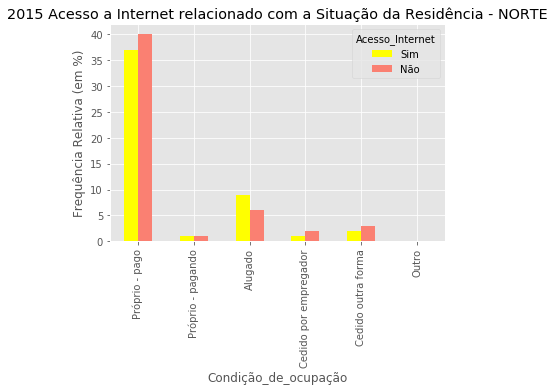

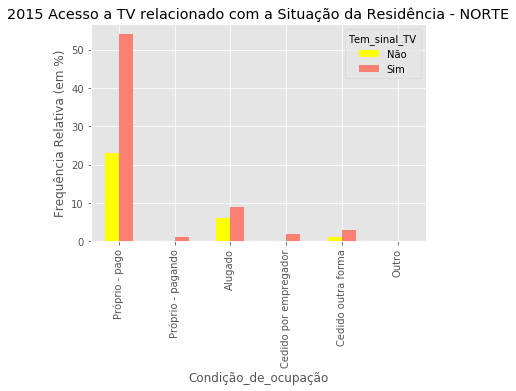

In [370]:
#2015 NORTE
#fig = plt.figure(figsize = (8,2))
#plt.subplot(131)
ct_in_Norte = pd.crosstab(tabela_Norte.Condição_de_ocupação, tabela_Norte.Acesso_Internet)
ct_in_Norte = (ct_in_Norte/ct_in_Norte.sum().sum()*100).round(decimals=0)
ct_in_Norte.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2015 Acesso a Internet relacionado com a Situação da Residência - NORTE")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(132)
ct_tv_Norte = pd.crosstab(tabela_Norte.Condição_de_ocupação, tabela_Norte.Tem_sinal_TV)
ct_tv_Norte = (ct_tv_Norte/ct_tv_Norte.sum().sum()*100).round(decimals=0)
ct_tv_Norte.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2015 Acesso a TV relacionado com a Situação da Residência - NORTE")
plt.ylabel('Frequência Relativa (em %)')

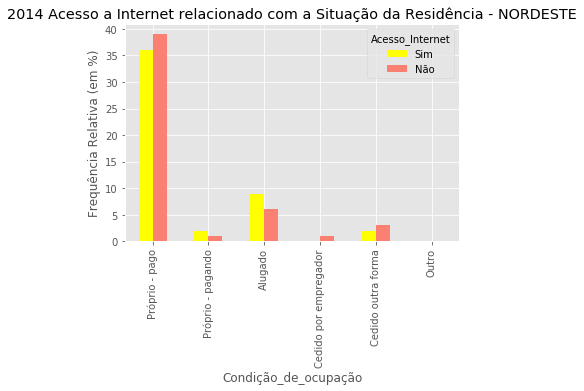

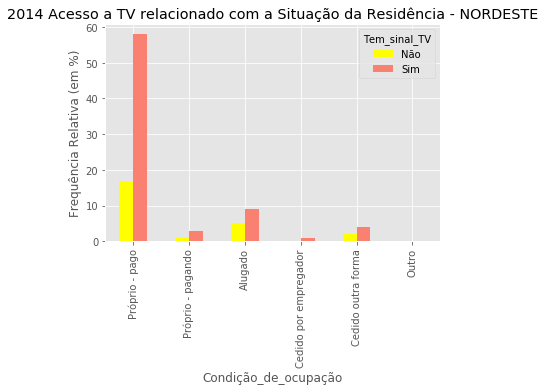

In [371]:
#2014 NORDESTE
#fig = plt.figure(figsize = (8,2))
#plt.subplot(131)
ct_in_Nordeste_2014 = pd.crosstab(tabela_Nordeste_2014.Condição_de_ocupação, tabela_Nordeste_2014.Acesso_Internet)
ct_in_Nordeste_2014 = (ct_in_Nordeste_2014/ct_in_Nordeste_2014.sum().sum()*100).round(decimals=0)
ct_in_Nordeste_2014.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2014 Acesso a Internet relacionado com a Situação da Residência - NORDESTE")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(132)
ct_tv_Nordeste_2014 = pd.crosstab(tabela_Nordeste_2014.Condição_de_ocupação, tabela_Nordeste_2014.Tem_sinal_TV)
ct_tv_Nordeste_2014 = (ct_tv_Nordeste_2014/ct_tv_Nordeste_2014.sum().sum()*100).round(decimals=0)
ct_tv_Nordeste_2014.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2014 Acesso a TV relacionado com a Situação da Residência - NORDESTE")
plt.ylabel('Frequência Relativa (em %)')


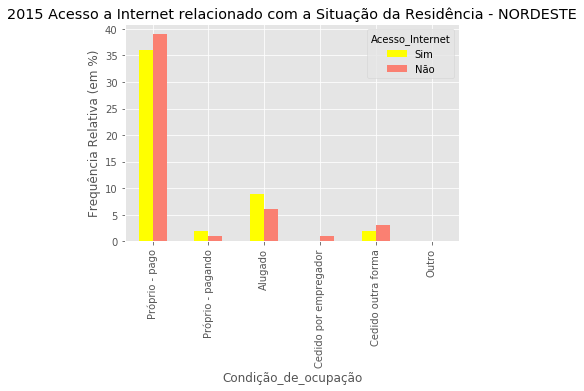

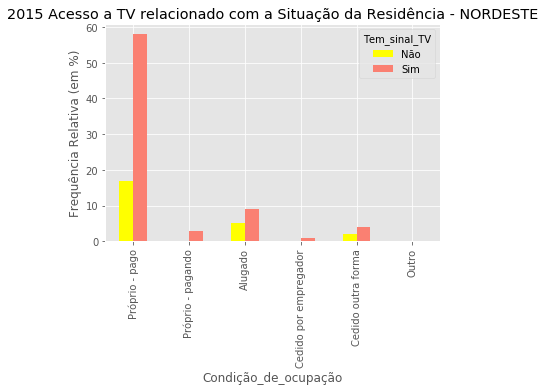

In [372]:
#2015 NORDESTE
#fig = plt.figure(figsize = (8,2))
#plt.subplot(131)
ct_in_Nordeste = pd.crosstab(tabela_Nordeste.Condição_de_ocupação, tabela_Nordeste.Acesso_Internet)
ct_in_Nordeste = (ct_in_Nordeste/ct_in_Nordeste.sum().sum()*100).round(decimals=0)
ct_in_Nordeste.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2015 Acesso a Internet relacionado com a Situação da Residência - NORDESTE")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(132)
ct_tv_Nordeste = pd.crosstab(tabela_Nordeste.Condição_de_ocupação, tabela_Nordeste.Tem_sinal_TV)
ct_tv_Nordeste = (ct_tv_Nordeste/ct_tv_Nordeste.sum().sum()*100).round(decimals=0)
ct_tv_Nordeste.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2015 Acesso a TV relacionado com a Situação da Residência - NORDESTE")
plt.ylabel('Frequência Relativa (em %)')


___
## Conclusão 

A fim de simplificar os dados, foi considerado que a residência que tem Sinal de tv, é aquela que recebe sinal digital OU sinal por antena. 

Analisando os gráficos vemos que o acesso à internet e TV está disponível em mais da metade das residências brasileiras, sendo o acesso à TV, significantemente mais presente comparado ao acesso à internet. É possível perceber que em todas as regiões, exeto por Norte e Nordeste, a maioria dos domicícios tem acesso tanto a internet, quanto a tv, sendo sempre o acesso a TV maior em frequência relativa. E comparando os dois anos, percebemos há sempre um aumento na frequência desse acesso. 
Já no Norte e Nordeste, vemos que menos da metade das residências tem acesso à internet, e apesar dessa frequência ter tido um aumento do ano de 2014 para o de 2015, percebemos que foi algo muito leve. Há muitas hipóteses que podem ser levantadas sobre essa questão, a que parece mais relevante é a falta de Infraestrutura dessas regiões, junto com a falta de investimento público para oferecer melhorias nesse setor. Ou seja, muitas pessoas gostariam de ter acesso à internet mas não existe disponibilidade do serviço na regiâo em que moram. Segundo o Instituto de Pesquisa Econômica Aplicada (Ipea), 11,6 milhões de domicílios brasileiros poderiam pagar pelo serviço de internet, mas ele não está disponível na sua localidade (2014).

Dentre as residências que estão em condição "Própria, mas ainda pagando" e "Alugada", vemos que nas casas que ainda estão sendo pagas, o índice do uso de internet e TV é bem menor em relação às residências alugadas. Isso pode estar ligado ao fato de que,
Segundo um levantamento do portal imobiliário Properati, a primeira prestação do imóvel financiado, em alguns lugares do Brasil, custa o dobro que o aluguel médio, e a parcela só fica mais barata do que a locação no 20º ano de um financiamento de 30 anos. Ou seja, os indivíduos que moram em residências própria, mas que ainda estão sendo pagas, têm um gasto significantemente maior do que aqueles que moram em residências alugadas, tendo assim, como conseguência, um poder aquisitivo dos que vivem em casas alugadas um tanto quanto maior, possibilitando gastos em outras áreas de intertenimento, como TV e Internet.
Uma pesquisa recente do Sebrae apontou que comprar uma casa ainda é o maior sonho para 47% dos brasileiros. Isso faz com que muitos brasileiros acabem se esforçando demasiadamente para conseguir comprar casa própria. Dentre esses esforços está a priorização dos gastos, cortando assim, despesas em entretenimento, como internet e TV.

Como o comportamento referente à influência que cada condição de residência tem no acesso à internet e TV se repte, abaixo temos, resumindo tudo o que foi analisado, um gráfico com esses dados referente a todo o Brasil. 

Finalizando a análise, vemos que o acesso à internet e TV no Brsil cresce, mas continua refletindo as diferenças regionais e sociais que existem em todo o nosso território.

Fontes bibliográficas:
http://www.valor.com.br/brasil/4027358/ibge-tv-por-assinatura-chega-quase-um-terco-dos-domicilios-no-pais
http://tecnologia.ig.com.br/2014-03-13/ipea-70-dos-domicilios-do-norte-e-nordeste-nao-possuem-acesso-a-internet.html
http://www.inova.jor.br/2017/06/06/falta-infraestrutura-banda-larga/
http://exame.abril.com.br/seu-dinheiro/1a-prestacao-da-casa-propria-custa-o-dobro-que-aluguel-em-sp/



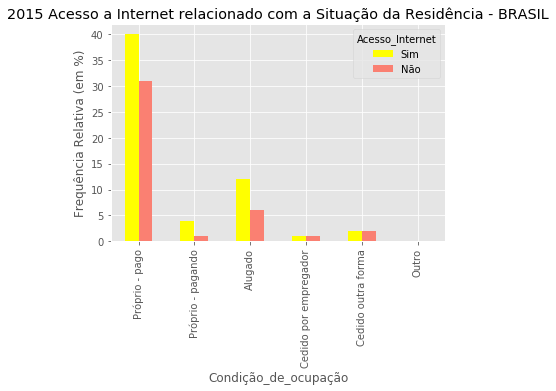

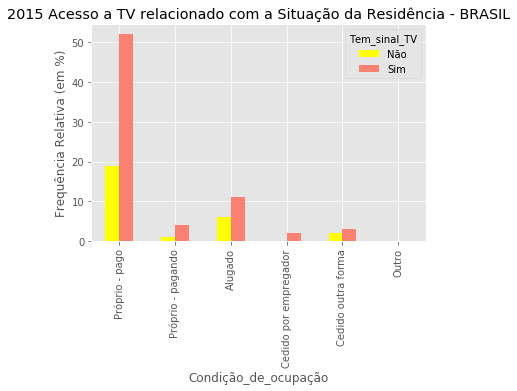

In [291]:
#2014
#fig = plt.figure(figsize = (8,2))
#plt.subplot(131)
ct_in_Brasil_2014 = pd.crosstab(nova_tabela_2014.Condição_de_ocupação, nova_tabela_2014.Acesso_Internet)
ct_in_Brasil_2014 = (ct_in_Brasil_2014/ct_in_Brasil_2014.sum().sum()*100).round(decimals=0)
ct_in_Brasil_2014.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2015 Acesso a Internet relacionado com a Situação da Residência - BRASIL")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(132)
ct_tv_Brasil_2014 = pd.crosstab(nova_tabela_2014.Condição_de_ocupação, nova_tabela_2014.Tem_sinal_TV)
ct_tv_Brasil_2014 = (ct_tv_Brasil_2014/ct_tv_Brasil_2014.sum().sum()*100).round(decimals=0)
ct_tv_Brasil_2014.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2015 Acesso a TV relacionado com a Situação da Residência - BRASIL")
plt.ylabel('Frequência Relativa (em %)')

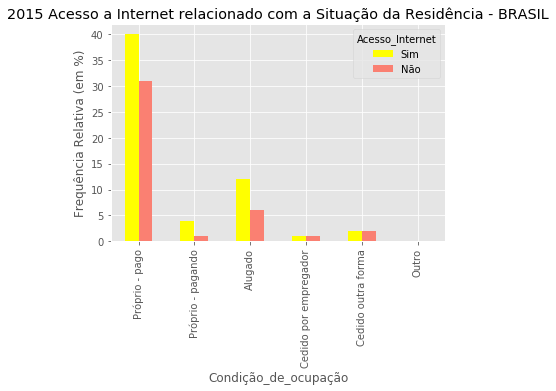

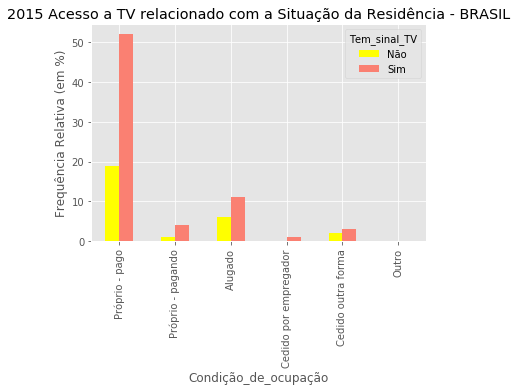

In [290]:
#2015
#fig = plt.figure(figsize = (8,2))
#plt.subplot(131)
ct_in_Brasil = pd.crosstab(nova_tabela.Condição_de_ocupação, nova_tabela.Acesso_Internet)
ct_in_Brasil = (ct_in_Brasil/ct_in_Brasil.sum().sum()*100).round(decimals=0)
ct_in_Brasil.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2015 Acesso a Internet relacionado com a Situação da Residência - BRASIL")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(132)
ct_tv_Brasil = pd.crosstab(nova_tabela.Condição_de_ocupação, nova_tabela.Tem_sinal_TV)
ct_tv_Brasil = (ct_tv_Brasil/ct_tv_Brasil.sum().sum()*100).round(decimals=0)
ct_tv_Brasil.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("2015 Acesso a TV relacionado com a Situação da Residência - BRASIL")
plt.ylabel('Frequência Relativa (em %)')